In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
label=pd.read_excel('/content/drive/MyDrive/training_label.xlsx')

In [ ]:
label.head()

,image,class,extent_of_damage,subset
0,image/0.jpeg,"dent, head_lamp",3,Training
1,image/1.jpeg,head_lamp,1,Training
2,image/2.jpeg,scratch,1,Training
3,image/3.jpeg,head_lamp,1,Training
4,image/4.jpeg,unknown,0,Training


In [ ]:
label['image']=label['image'].replace('image/','',regex=True)

In [ ]:
label.head()

,image,class,extent_of_damage,subset
0,0.jpeg,"dent, head_lamp",3,Training
1,1.jpeg,head_lamp,1,Training
2,2.jpeg,scratch,1,Training
3,3.jpeg,head_lamp,1,Training
4,4.jpeg,unknown,0,Training


In [ ]:
label.drop('subset',inplace=True,axis=1)

In [ ]:
label.head()

,image,class,extent_of_damage
0,0.jpeg,"dent, head_lamp",3
1,1.jpeg,head_lamp,1
2,2.jpeg,scratch,1
3,3.jpeg,head_lamp,1
4,4.jpeg,unknown,0


In [ ]:
label.isnull().sum()

image               0
class               0
extent_of_damage    0
dtype: int64

In [ ]:
label['class'].unique()

array(['dent, head_lamp', 'head_lamp', 'scratch', 'unknown',
       'dent,head_lamp', 'glass_shatter', 'tail_lamp', 'dent',
       'dent,scratch', 'head_lamp,glass_shatter,dent,scratch,tail_lamp',
       'head_lamp,dent', 'glass_shatter,dent,scratch',
       'head_lamp,dent,scratch', 'head_lamp,dent,scratch,glass_shatter',
       'tail_lamp,scratch', 'dent,scratch,glass_shatter', 'scratch,dent',
       'head_lamp,scratch,dent', 'tail_lamp,scratch,dent',
       'tail_lamp,dent,scratch', 'head_lamp,scratch', 'tail_lamp,dent',
       'glass_shatter,dent', 'head_lamp,scratch,dent,glass_shatter'],
      dtype=object)

In [ ]:
label['class'].nunique()

24

In [ ]:
label['extent_of_damage'].unique()

array([3, 1, 0, 2])

In [ ]:
label['class']=label['class'].str.split(',')
#label[['class1','class2','class3','class4','class5','class6']] = label['class'].str.split(',', expand=True)

label.tail()

,image,class,extent_of_damage
796,796.jpeg,[unknown],0
797,797.jpeg,[head_lamp],1
798,798.jpeg,[unknown],0
799,799.jpeg,[dent],1
800,800.jpeg,[head_lamp],1


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
label = label.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(label.pop('class')),
                index=label.index,
                columns=mlb.classes_))

In [ ]:
label.head()

,image,extent_of_damage,head_lamp,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,3,1,1,0,0,0,0,0
1,1.jpeg,1,0,0,0,1,0,0,0
2,2.jpeg,1,0,0,0,0,1,0,0
3,3.jpeg,1,0,0,0,1,0,0,0
4,4.jpeg,0,0,0,0,0,0,0,1


In [ ]:

#label_final = pd.get_dummies(label, columns = ['extent_of_damage'])
label.drop('extent_of_damage',inplace=True,axis=1)
label_final=label
label_final.head()

,image,head_lamp,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,1,1,0,0,0,0,0
1,1.jpeg,0,0,0,1,0,0,0
2,2.jpeg,0,0,0,0,1,0,0
3,3.jpeg,0,0,0,1,0,0,0
4,4.jpeg,0,0,0,0,0,0,1


In [ ]:
label_final.shape
col=label.columns

In [ ]:
data=[]
train_path='/content/drive/MyDrive/4.Train'
for i in range(len(os.listdir(train_path))-1):
  path=os.path.join(train_path,label_final['image'][i])
  img=cv2.imread(path)
  data.append(img)

KeyError: ignored

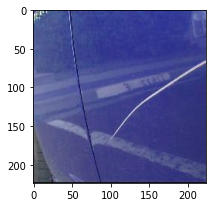

In [ ]:
# samples=4
# n=2
# m=2

# for i in range(1,samples+1):
#   fig=plt.figure(figsize=(14,7))

#   j=np.random.randint(0,800)
#   plt.subplot(2,2,i)
#   plt.imshow(data[j])
#   #plt.title(f"class={label['class'][j]}")
#   plt.ylabel(f"damage={label['extent_of_damage'][j]}")
#   plt.show()

In [ ]:
label_final.drop(['image'],axis=1,inplace=True)

label_final.head()

,head_lamp,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,1,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1


In [ ]:
label_final['head_lamp'] = label_final['head_lamp'] + label_final[' head_lamp']

In [ ]:
label_final.drop([' head_lamp'],axis=1,inplace=True)

label_final.head()

,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,1,0,2,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [ ]:
out_col=label_final.columns
Y=label_final.to_numpy()

In [ ]:
Y[0]

array([1, 0, 2, 0, 0, 0])

In [ ]:
X = np.array(data)

In [ ]:
X.shape

(801, 224, 224, 3)

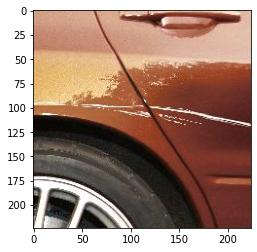

In [ ]:
plt.imshow(X[2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [ ]:
#create a datagenrator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


In [ ]:
#from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
#from keras.applications.resnet50 import ResNet50
# from keras.models import Model
# import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
# import tensorflow as tf
# import keras

# restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

# output = restnet.layers[-1].output
# output = keras.layers.Flatten()(output)
# restnet = Model(restnet.input, output)
# for layer in restnet.layers:
#     layer.trainable = False
# restnet.summary()

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
# from keras.models import Sequential
# #from keras import optimizers
# from tensorflow.keras import optimizers

# model = Sequential()
# model.add(restnet)
# model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
# model.add(Dropout(0.3))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(11, activation='sigmoid'))


# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=2e-5),
#               metrics=['accuracy'])

# model.summary()

In [ ]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import tensorflow as tf
import keras
# base_model = keras.applications.vgg16.VGG16(
#     weights='imagenet',  # Load weights pre-trained on ImageNet.
#     input_shape=(224, 224, 3), # VGG16 expects min 32 x 32
#     include_top=False)  # Do not include the ImageNet classifier at the top.
# base_model.trainable = False
# inputs = keras.Input(shape=(224, 224, 3))
# x = base_model(inputs, training=False)
# x = keras.layers.GlobalAveragePooling2D()(x)
# initializer = tf.keras.initializers.GlorotUniform(seed=42)

# activation =  tf.keras.activations.sigmoid #None  # tf.keras.activations.sigmoid or softmax

# outputs = keras.layers.Dense(10,
#                              kernel_initializer=initializer,
#                              activation=activation)(x) 
# model = keras.Model(inputs, outputs)


# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(11, activation='sigmoid'))


In [ ]:
#from keras.applications import VGG16
from keras.layers import Dropout
from keras.models import Model

base_model = keras.applications.vgg16.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)

activation =  tf.keras.activations.sigmoid #None  # tf.keras.activations.sigmoid or softmax

outputs = keras.layers.Dense(6,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
model = keras.Model(inputs, outputs)




#Store the fully connected layers
fc1 =model.layers[-3]
fc2 = model.layers[-2]
predictions = model.layers[-1]

# Create the dropout layers
dropout1 = Dropout(0.50)
dropout2 = Dropout(0.10)

# Reconnect the layers
x = dropout1(fc1.output)
x = fc2(x)
x = dropout2(x)
predictors = predictions(x)

# Create a new model
model2 = Model(base_model.input, predictors)



In [ ]:
# vgg_model = keras.applications.vgg16.VGG16(weights='imagenet',
#                                include_top=False,
#                                input_shape=(224, 224, 3))

# # Creating dictionary that maps layer names to the layers
# layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# # Getting output tensor of the last VGG layer that we want to include
# x = layer_dict['block2_pool'].output

# # Stacking a new simple convolutional network on top of it    
# x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(10, activation='softmax')(x)

# # Creating new model. Please note that this is NOT a Sequential() model.
# from keras.models import Model
# custom_model = Model(vgg_model.input, x)

# # Make sure that the pre-trained bottom layers are not trainable
# for layer in custom_model.layers[:7]:
#     layer.trainable = False

# # Do not forget to compile it
# custom_model.compile(loss='binary_crossentropy',
#                      optimizer='adam',
#                      metrics=['accuracy'])

In [ ]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
                metrics=[keras.metrics.BinaryAccuracy()])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# from tensorflow.keras.models import load_model

# model=load_model('/content/drive/MyDrive/Damage_detection_final0.1_0.5')

In [ ]:
H = model2.fit(
	x=aug.flow(X_train, y_train, batch_size=8),
	validation_data=(X_test, y_test),
	steps_per_epoch=len(X_train) // 8,
	epochs=50)

Epoch 1/50
80/80 [==============================] - 10s 115ms/step - loss: 1.6485 - binary_accuracy: 0.6786 - val_loss: 0.9000 - val_binary_accuracy: 0.7992
Epoch 2/50
80/80 [==============================] - 9s 110ms/step - loss: 1.1378 - binary_accuracy: 0.7440 - val_loss: 0.6825 - val_binary_accuracy: 0.8168
Epoch 3/50
80/80 [==============================] - 9s 111ms/step - loss: 0.9299 - binary_accuracy: 0.7719 - val_loss: 0.5897 - val_binary_accuracy: 0.8406
Epoch 4/50
80/80 [==============================] - 9s 110ms/step - loss: 0.7552 - binary_accuracy: 0.7951 - val_loss: 0.5123 - val_binary_accuracy: 0.8737
Epoch 5/50
80/80 [==============================] - 9s 110ms/step - loss: 0.7448 - binary_accuracy: 0.7940 - val_loss: 0.5116 - val_binary_accuracy: 0.8778
Epoch 6/50
80/80 [==============================] - 9s 116ms/step - loss: 0.6554 - binary_accuracy: 0.8076 - val_loss: 0.5125 - val_binary_accuracy: 0.8665
Epoch 7/50
80/80 [==============================] - 11s 141ms/s

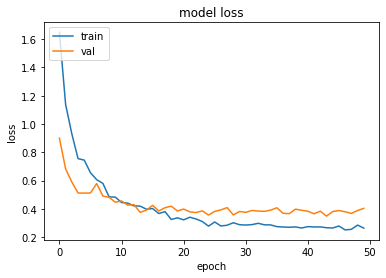

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model

model2.save("Damage_detection_final_better.h5")



In [ ]:
import re
test_path='/content/drive/MyDrive/4.Test'
col_name=os.listdir(test_path)
col_name.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
col_name[0]

'801.jpeg'

In [ ]:

test_data=[]
#test_path='/content/drive/MyDrive/4.Test'
#col_name=os.listdir(test_path)
for i in range(len(os.listdir(test_path))-1):
  path=os.path.join(test_path,col_name[i])
  img=cv2.imread(path)
  test_data.append(img)

In [ ]:
test_data=np.array(test_data)
out=model2.predict(test_data)

In [ ]:
pred_test=[]
for y in out:
  x=np.rint(y[:6])
  #damage=list(y[6:])
  #x=np.concatenate((x,[damage.index(max(damage))]))
  pred_test.append(x)

In [ ]:
def predict(n,out_col,pred,X_test):
  output=pred[n]
  out_img=X_test[n]

  ans=[]
  for i in range(len(output)):
    if(output[i]==1):
      ans.append(out_col[i])
  #ans.append(output[-1])

  return ans,out_img

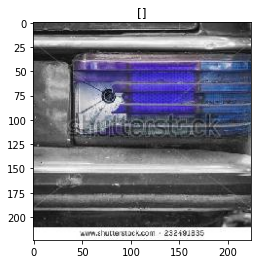

In [ ]:

ans,out_image=predict(16,out_col,pred_test,test_data)

plt.imshow(out_image)
plt.title(ans)
plt.show()

In [ ]:
df = pd.DataFrame(pred_test, columns = out_col )

In [ ]:
df.head()

,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df['sum' ] =df['dent'] + df['glass_shatter'] + df['head_lamp'] + df['scratch'] + df['tail_lamp'] + df['unknown']

In [ ]:
df['sum'].value_counts()

1.0    175
0.0     58
2.0     43
3.0     19
5.0      2
4.0      2
Name: sum, dtype: int64

In [ ]:
df_img_names = pd.DataFrame(col_name, columns = ['image'] )

In [ ]:
final_df=pd.concat([df_img_names,df],axis=1)

In [ ]:
final_df['image'] = 'image/' + final_df['image'].astype(str)
final_df.drop('sum' , inplace=True,axis=1)

In [ ]:
final_df.head()

,image,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,image/image/image/image/801.jpeg,0.0,0.0,0.0,0.0,0.0,0.0
1,image/image/image/image/802.jpeg,0.0,0.0,0.0,0.0,0.0,0.0
2,image/image/image/image/803.jpeg,0.0,0.0,0.0,0.0,0.0,1.0
3,image/image/image/image/804.jpeg,0.0,0.0,0.0,0.0,0.0,0.0
4,image/image/image/image/805.jpeg,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pred_test[16]

array([0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import os;
print(os.getcwd())



In [ ]:
out=model2.predict(X_test)

In [ ]:
print(out_col)

In [ ]:
def predict(n,out_col,out,test_data):
  output=np.rint(out[n])
  out_img=X_test[n]

  ans=[]
  ori=[]
  for i in range(len(output)-1):
    if(output[i]==1):
      ans.append(out_col[i])
    

  return ans,out_img

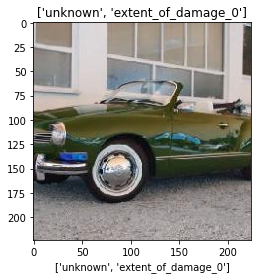

In [ ]:
n=np.random.randint(0,80)
ans,out_image,ori=predict(n,out_col,out,X_test,y_test)

plt.imshow(out_image)
plt.title(ans)
plt.xlabel(ori)
plt.show()

In [ ]:
print(out[28])

[4.0095550e-01 2.2722243e-06 1.7984006e-06 1.3579144e-01 5.6216420e-05
 5.8303274e-05 4.8095990e-05 9.9669755e-01 2.2654154e-05 3.8732821e-09]


In [ ]:
def predict(n,out_col,out,X_test,y_test):
  output=np.rint(out[n])
  out_img=X_test[n]

  ans=[]
  ori=[]
  for i in range(len(output)):
    if(output[i]==1):
      ans.append(out_col[i])
    if(y_test[n][i]==1):
      ori.append(out_col[i])

  return ans,out_img,ori